In [23]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
from qiskit_machine_learning.utils.loss_functions import CrossEntropyLoss

plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 20,
                     'axes.labelsize': 24,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

In [24]:
d=8
features=2
prefix = f'features={features}/d={d}/'
d2=16
features2=8
prefix2 = f'features={features2}/d={d2}/'
ds = [d,d2]
sep = 'separable'

[-2.80872312 -0.35171363]


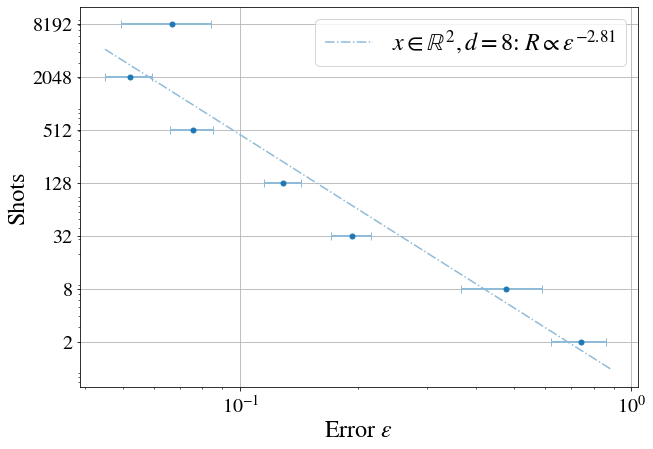

In [27]:
plt.figure(figsize=(10,7))

# blue
color_0 = '#1f77b4'
color_0_light = '#8fbbd9'

# orange
color_1 = '#ff7f0e'
color_1_light = '#ffbf86'

colors = [color_0, color_1]
colors_light = [color_0_light,color_1_light]
labels = [r'$x \in \mathbb{R}^2, d=8$: ',r'$x \in \mathbb{R}^8, d=16$: ']

for i, pre in enumerate([prefix]):
    df = pd.read_csv(f'{pre}spsa_sgd_{sep}.csv')
    df = df[df['Evaluations'] > 600]
    shots = list(set(df['Shots']))
    means = [np.mean(df['Epsilon'][df['Shots'] == R][:7]) for R in shots]
    stds = [np.std(df['Epsilon'][df['Shots'] == R][:7]) for R in shots]
    #plt.scatter(df['Epsilon'],df['Shots'])
    plt.errorbar(means,shots,xerr=stds,marker='.',ecolor=colors_light[i],elinewidth=2.,ls='',capsize=4,color=colors[i],markersize=10)
    p = np.polyfit(np.log(means),np.log(shots),1)
    print(p)
    efine = np.linspace(min(df['Epsilon']),max(df['Epsilon']))
    plt.plot(efine,np.exp(p[1])*efine**(p[0]),linestyle='-.',color=colors_light[i] ,label=labels[i] + r'$R\propto\varepsilon^{{%.2f}}$'%p[0])

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Shots')
plt.yticks(shots,[int(s) for s in shots])
plt.xlabel(r'Error $\varepsilon$')
plt.legend()
plt.grid()
#plt.savefig('plots/exponent_separable.png',dpi=300,bbox_inches='tight')


In [5]:
for i, pre in enumerate([prefix]):
    df = pd.read_csv(f'{pre}spsa_sgd_{sep}.csv')
    df = df[df['Evaluations'] > 600]
    shots = list(set(df['Shots']))
    means = [np.mean(df['Epsilon'][df['Shots'] == R][:7]) for R in shots]
    stds = [np.std(df['Epsilon'][df['Shots'] == R][:7]) for R in shots]
    plt.scatter(d,)

TypeError: scatter() missing 1 required positional argument: 'y'

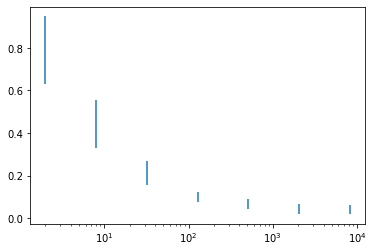

In [44]:
epsilons = [df['Epsilon'][df['Shots'] == R] for R in list(set(df['Shots']))]
means = [np.array(e).mean() for e in epsilons]
std = np.array([np.array(e).std() for e in epsilons])
plt.errorbar(list(set(df['Shots'])),means,yerr=2*std,linestyle='')
plt.xscale('log')

In [20]:
def convergence_stop(file,R,tol=0.5*1e-2):
    history = pickle.load(open(f'{prefix}dumps/{sep}_spsa_sgd_{file}.pkl','rb'))
    params = np.array(history['params'])
   
    err = np.linalg.norm(params - params[-1],axis=1) / d
    plt.plot(np.arange(len(err)),err,label=f'R={R}')
    stop = np.where(err < tol)[0][0]
    stop2 = np.where(err[:-1] - err[1:] < tol/10)[0][0]
    if stop:
        print(file)
        print(stop)
        plt.vlines(stop,0,1,colors='red')
        #plt.vlines(stop2,0,1,colors='green')
    

In [6]:
def plot_pickle(file):
    history = pickle.load(open(f'{prefix}dumps/{sep}_spsa_sgd_{file}.pkl','rb'))
    acc = np.array(history['params'])[:,1]
    loss = history['loss']
    accc = np.array(history['params_control'])[:,1]
    lossc = history['loss_control']

    #acc = np.append(acc,accc[0])
    loss = np.append(loss,lossc[0])
    
    f,axs = plt.subplots(1,2)
    f.suptitle(file)
    axs[0].plot(range(len(acc)),acc)
    axs[0].plot(range(len(acc)-1,len(acc) + len(accc) -1),accc)
    #axs[0].set_ylim(0.5,1)
    
    axs[1].plot(range(len(loss)),loss)
    axs[1].plot(range(len(loss)-1,len(loss) + len(lossc) -1),lossc)
    
    #axs[1].set_ylim(40,50)
    #axs[1].set_xlim(0,50)
    plt.show()


In [28]:
def plot_accuracy(file,R):
    history = pickle.load(open(f'{prefix}dumps/{sep}_spsa_sgd_{file}.pkl','rb'))
    loss = history['accuracy']
    plt.plot(range(len(loss)),loss,label=f'R = {R}')
    print(loss[-1])

In [7]:
def plot_loss(file,R):
    history = pickle.load(open(f'{prefix}dumps/{sep}_spsa_sgd_{file}.pkl','rb'))
    loss = history['loss']
    plt.plot(range(len(loss)),loss,label=f'R = {R}')
    print(loss[-1])

In [16]:
def plot_params(file,R,seed):
    history = pickle.load(open(f'{prefix}dumps/{sep}_spsa_sgd_{file}.pkl','rb'))
    params = np.array(history['params'])
    params = params
    cparams = np.array(history['params_control'])
    np.random.seed(2*seed)
    theta = 0.1*(2*np.random.rand(d))
    #print(theta)
    params = np.vstack(([theta],params))
    #print(params[:3])
    plt.plot(params[:,0],params[:,1],marker='x',label=f'R = {R}',zorder=0)
    plt.plot(cparams[:,0],cparams[:,1],marker='.',color='black',zorder=5)

    if R==2:
        theta = history['theta_true']
        h_true = history['h_true']
        plt.scatter(theta[0],theta[1],c='black',marker='*',zorder=10)
        loss = CrossEntropyLoss()
        true_loss = np.sum(loss.evaluate(h_true,np.round(h_true)))
        #print(true_loss, history['loss'][-1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'plot_loss' is not defined

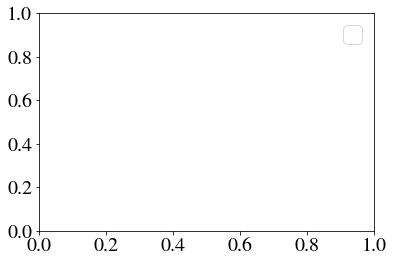

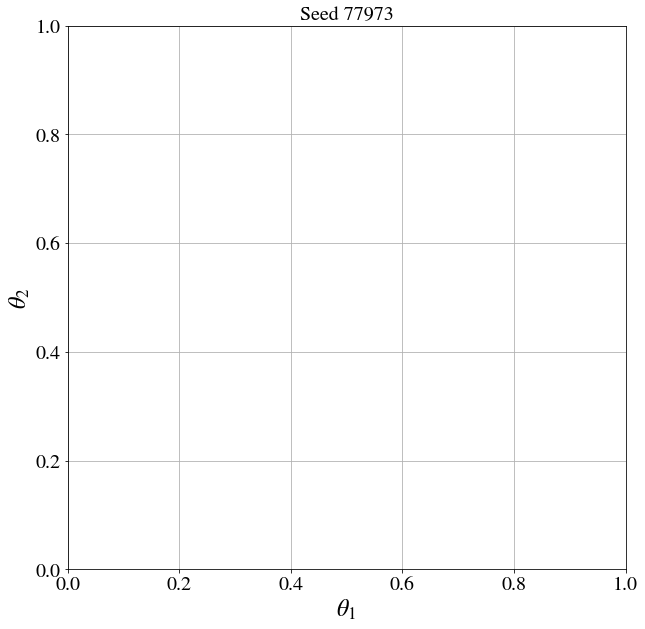

In [29]:
old_seed = 0

df = pd.read_csv(f'{pre}spsa_sgd_{sep}.csv')

for i,r in df.iterrows():
    s = int(r['Seed'])
    if s != old_seed:
        plt.legend()
        plt.figure(figsize=(10,10))
        plt.title(f'Seed {s}')
        plt.xlabel(r'$\theta_1$')
        plt.ylabel(r'$\theta_2$')
        plt.grid()
        
        old_seed = s
    R = int(r['Shots'])
    
    c = int(r['CSteps'])

    steps = int(r['Evaluations'])
    file = f'seed_{s}_R_{R}_steps_{steps}_csteps_{c}'
    #plot_pickle(file)
    #convergence_stop(file,R)
    plot_loss(file, R)
    #plot_params(file,R,s)


    
plt.legend()

    